# Purpose

Overlay 2 images in one plot, with the top image having selected regions of transparency.

# Approach

Use foreground image with `alpha` map. See [Blend transparency with color in 2D images](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_transparency_blend.html), section *Blending in transparency*.

Basic idea:

- Add a foreground image on top of a background image, where the foreground image is modified by a map (image) of alpha values.
- The alpha image has the same shape as the background and foreground images.


# Imports

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Code

In [2]:
def show_geometry(ax, background_image, threshold=1e-5, value=0.4, fg_cmap="YlGn", origin="lower"):
    """Given a background image and matplotlib axes, plot mask on top of
    background image with selected background regions a uniform color and
    everything else transparent.
    """
    
    assert value <= 1 and value >=0
    
    foreground = np.ones(background_image.shape) * value

    alphas = np.zeros(background_image.shape, dtype=float)
    alphas[np.where(background_image < threshold)] = 1

    im = ax.imshow(foreground, alpha=alphas, origin=origin, cmap=fg_cmap, vmin=0, vmax=1);

    return im

# Concentration map

In [3]:
background = np.loadtxt(Path("data") / "test_data.csv", delimiter=',')
print(f"Shape: {background.shape}")
print(f"Min, Max values: {np.min(background)}, {np.max(background)}")

Shape: (81, 81)
Min, Max values: 0.0, 0.990795


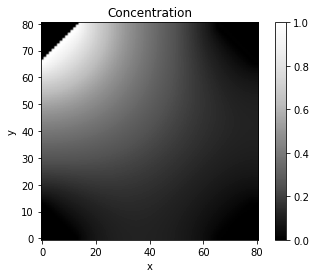

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r', vmin=0, vmax=1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Concentration")
fig.colorbar(im);

# Geometry overlaid on concentration map

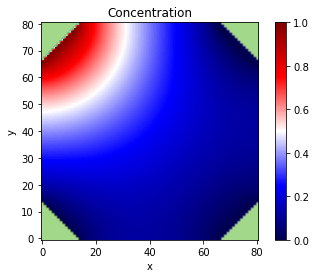

In [5]:
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap="seismic", vmin=0, vmax=1)
show_geometry(ax, background)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Concentration")
fig.colorbar(im);